In [1]:
%matplotlib inline
# globals
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

In [2]:
# matplotlib default customizations
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = [
                                            'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [3]:
data = pd.read_csv('../processeddata/20161207_purovergapdh_quant.csv')
print data

    pulselength_min  time_hours cellline samplelabel  \
0                 5         1.5  293T WT        Rich   
1                 5         3.0  293T WT        Rich   
2                 5         6.0  293T WT        Rich   
3                 5        12.0  293T WT        Rich   
4                 5         1.5  293T WT        -Leu   
5                 5         3.0  293T WT        -Leu   
6                 5         6.0  293T WT        -Leu   
7                 5        12.0  293T WT        -Leu   
8                 5         1.5  293T WT        -Arg   
9                 5         3.0  293T WT        -Arg   
10                5         6.0  293T WT        -Arg   
11                5        12.0  293T WT        -Arg   

    relative_puroincorporation  
0                     1.000000  
1                     1.000000  
2                     1.000000  
3                     1.000000  
4                     0.794204  
5                     0.581749  
6                     0.447567  
7      

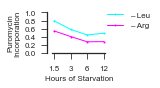

In [19]:
from matplotlib.legend_handler import HandlerLine2D
cellline = ['293T']
conditions = ['-Leu','-Arg']
times = ['1.5','3','6','12']
sampleOrder = np.array([0,1,2,3])
xlocations =np.array([0,1,2,3])

fig = plt.figure()


    
ax = fig.add_subplot(1,1,1)



for condition in conditions:
    subset = data['samplelabel'].apply(
        lambda label: label.find(condition) != -1)
    subsetdata = data[subset]
    x = xlocations
    y = subsetdata['relative_puroincorporation']
    ax.plot(x, y, marker = 'o', markersize=2, linewidth=1, label = condition.replace('-',u'– '))
    
        
spineOffset = {'left': 5, 'bottom': 0}   
[ spine.set_position(('outward',spineOffset[loc])) 
    if loc in ['left','bottom'] else spine.set_color('none') 
    for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.xaxis.set(ticks = x, ticklabels = times)
ax.set_xlim(-0.1,max(x) + 0.1)
ax.set_ylim(bottom = 0, top = 1)
ax.yaxis.set( major_locator = MaxNLocator(5) )
ax.set_xlabel('Hours of Starvation')

ax.set_ylabel('Puromycin\nIncorporation')

ax.legend(handler_map={ax: HandlerLine2D(numpoints=2)},loc = 2, bbox_to_anchor = (.9,1.2),framealpha=0)
    
fig.set_size_inches([.95,.75])
fig.subplots_adjust(wspace = 0.75)
fig.savefig('../figures/20171206_293ttc5minpulse_1reprichleuarg_linegraph_forpaper.svg')
#fig.savefig('../figures/.pdf',bbox_inches='tight')
